# Plant Disease Dataset - Exploratory Data Analysis

Clinical analysis of the plant disease detection dataset with comprehensive statistics and visualizations.

In [1]:
# Bootstrap cell - setup environment and dependencies
import sys
import platform
import random
import numpy as np
from pathlib import Path

print(f"Python version: {platform.python_version()}")
print(f"Platform: {platform.platform()}")

# Set reproducible seeds
random.seed(42)
np.random.seed(42)

# Add project root to path
project_root = Path.cwd().parent
sys.path.append(str(project_root))
print(f"Project root: {project_root}")

# Optional: Install requirements (uncomment if needed)
# %pip install -r ../requirements.txt

Python version: 3.11.13
Platform: Windows-10-10.0.26100-SP0
Project root: C:\Users\MadScie254\Documents\GitHub\Capstone-Lazarus


In [2]:
# Import data utilities and visualization libraries
from src.data_utils import PlantDiseaseDataLoader
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import os

print("✅ All imports successful")

2025-09-20 17:25:46,005 - src - INFO - CAPSTONE-LAZARUS v1.0.0 initialized
2025-09-20 17:25:46,007 - src - INFO - Project root: C:\Users\MadScie254\Documents\GitHub\Capstone-Lazarus
2025-09-20 17:25:46,009 - src - INFO - Data directory: C:\Users\MadScie254\Documents\GitHub\Capstone-Lazarus\data
2025-09-20 17:25:46,011 - src - INFO - Models directory: C:\Users\MadScie254\Documents\GitHub\Capstone-Lazarus\models
2025-09-20 17:25:46,620 - numexpr.utils - INFO - NumExpr defaulting to 12 threads.


✅ All imports successful


In [3]:
# Initialize data loader and compute comprehensive statistics
data_path = "../data"
loader = PlantDiseaseDataLoader(data_path)

print("🔍 Computing dataset statistics...")
stats = loader.get_dataset_stats(compute_image_shape=True, sample_max=500)

print(f"\n📊 Dataset Summary:")
print(f"   Total Images: {stats['total_images']:,}")
print(f"   Valid Images: {stats['valid_images']:,}")
print(f"   Corrupted Images: {stats['corrupted_images']:,}")
print(f"   Number of Classes: {stats['num_classes']}")
print(f"   Imbalance Ratio: {stats['imbalance_ratio']:.2f}")
if stats['mean_image_shape']:
    print(f"   Mean Image Shape: {stats['mean_image_shape']}")

🔍 Computing dataset statistics...
🔍 Scanning dataset for comprehensive statistics...
✅ Dataset statistics complete:
   📊 Total Images: 52,266
   ✅ Valid Images: 52,266
   ❌ Corrupted Images: 0
   🏷️  Classes: 19
   ⚖️  Imbalance Ratio: 35.24

📊 Dataset Summary:
   Total Images: 52,266
   Valid Images: 52,266
   Corrupted Images: 0
   Number of Classes: 19
   Imbalance Ratio: 35.24
   Mean Image Shape: (256, 256)


In [4]:
# Display the dataset DataFrame
df = stats['dataframe']
print(f"📋 Dataset DataFrame ({len(df)} rows):")
display(df.head(10))

print(f"\n📈 DataFrame Info:")
print(df.info())

print(f"\n🎯 Class Distribution:")
class_summary = df['class_name'].value_counts()
display(class_summary)

📋 Dataset DataFrame (52266 rows):


,image_path,class_name,width,height,file_size
0,..\data\Corn_(maize)___Cercospora_leaf_spot Gr...,Corn_(maize)___Cercospora_leaf_spot Gray_leaf_...,256,256,17604
1,..\data\Corn_(maize)___Cercospora_leaf_spot Gr...,Corn_(maize)___Cercospora_leaf_spot Gray_leaf_...,256,256,15428
2,..\data\Corn_(maize)___Cercospora_leaf_spot Gr...,Corn_(maize)___Cercospora_leaf_spot Gray_leaf_...,256,256,16398
3,..\data\Corn_(maize)___Cercospora_leaf_spot Gr...,Corn_(maize)___Cercospora_leaf_spot Gray_leaf_...,256,256,10418
4,..\data\Corn_(maize)___Cercospora_leaf_spot Gr...,Corn_(maize)___Cercospora_leaf_spot Gray_leaf_...,256,256,15050
5,..\data\Corn_(maize)___Cercospora_leaf_spot Gr...,Corn_(maize)___Cercospora_leaf_spot Gray_leaf_...,256,256,10819
6,..\data\Corn_(maize)___Cercospora_leaf_spot Gr...,Corn_(maize)___Cercospora_leaf_spot Gray_leaf_...,256,256,16253
7,..\data\Corn_(maize)___Cercospora_leaf_spot Gr...,Corn_(maize)___Cercospora_leaf_spot Gray_leaf_...,256,256,19229
8,..\data\Corn_(maize)___Cercospora_leaf_spot Gr...,Corn_(maize)___Cercospora_leaf_spot Gray_leaf_...,256,256,19982
9,..\data\Corn_(maize)___Cercospora_leaf_spot Gr...,Corn_(maize)___Cercospora_leaf_spot Gray_leaf_...,256,256,14718



📈 DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52266 entries, 0 to 52265
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   image_path  52266 non-null  object
 1   class_name  52266 non-null  object
 2   width       52266 non-null  int64 
 3   height      52266 non-null  int64 
 4   file_size   52266 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 2.0+ MB
None

🎯 Class Distribution:


class_name
Tomato___Tomato_Yellow_Leaf_Curl_Virus                10714
Tomato___Bacterial_spot                                4254
Tomato___Late_blight                                   3816
Tomato___Septoria_leaf_spot                            3542
Tomato___Spider_mites Two-spotted_spider_mite          3352
Tomato___healthy                                       3182
Tomato___Target_Spot                                   2808
Corn_(maize)___Common_rust_                            2384
Corn_(maize)___healthy                                 2324
Tomato___Early_blight                                  2000
Potato___Early_blight                                  2000
Potato___Late_blight                                   2000
Corn_(maize)___Northern_Leaf_Blight                    1970
Corn_(maize)___Northern_Leaf_Blight_oversampled        1970
Corn_(maize)___Northern_Leaf_Blight_undersampled       1970
Tomato___Leaf_Mold                                     1904
Corn_(maize)___Cercospora_lea

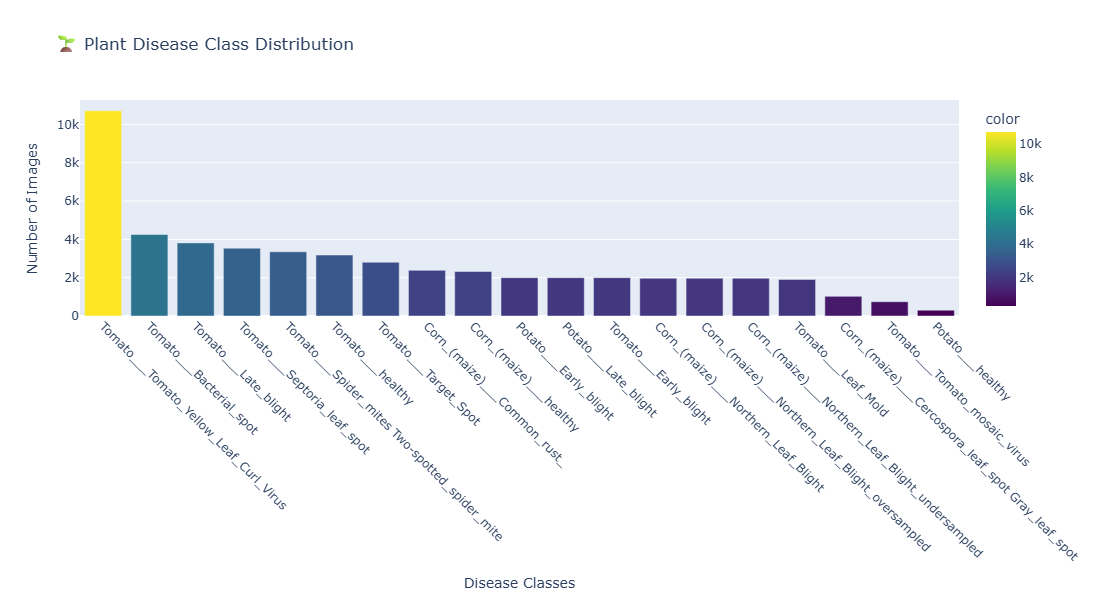

In [5]:
# Create interactive class distribution visualization
class_counts = stats['class_distribution']

# Sort by count for better visualization
sorted_classes = dict(sorted(class_counts.items(), key=lambda x: x[1], reverse=True))

# Create bar chart
fig = px.bar(
    x=list(sorted_classes.keys()),
    y=list(sorted_classes.values()),
    title="🌱 Plant Disease Class Distribution",
    labels={'x': 'Disease Classes', 'y': 'Number of Images'},
    color=list(sorted_classes.values()),
    color_continuous_scale='viridis'
)

fig.update_layout(
    height=600,
    xaxis_tickangle=45,
    showlegend=False
)

fig.show()

In [6]:
# Export visualization to reports directory
reports_dir = Path("../reports")
reports_dir.mkdir(exist_ok=True)

output_path = reports_dir / "eda_class_distribution.html"
fig.write_html(str(output_path))

print(f"📁 Visualization saved to: {output_path}")
print(f"✅ EDA analysis complete!")

📁 Visualization saved to: ..\reports\eda_class_distribution.html
✅ EDA analysis complete!
